# The properties of the estimators

## Task 1

Generate a sample of $X_1, ..., X_N$ from a uniform distribution on the segment $[0, \theta]$ for $N = 10^4$. For all $n \leq N$, calculate the estimators of the parameter $\theta$ from the theoretical problem: $2\overline{X}, \overline{X} + X_{(n)} / 2, (n + 1)X_{(1)} , X_{(1)} + X_{(n)} , \frac{n+1}{n}X_(n)$. Plot on the same graph with different colors for all estimators of the function of the estimation difference module and the true value of $\theta$ depending on $n$. 
If some estimators (for a fixed value of $n$) differ greatly from the true value of the parameter, then exclude them and build another graph with all the curves (for the changed value of $\theta$).
What is the best estimator (in the sense of the mentioned difference module for $n = N$)? Run an experiment for different values of $\theta$ (the number of graphs is equal to the number of values of $\theta$).

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Let's create a function that will calculate estimators for different values of $n$.

In [2]:
def experimental_conditions(n, b):
    samples = sps.uniform.rvs(loc=0, scale=b, size=n)

    first = 2 * np.cumsum(samples) / (np.arange(n) + 1)
    second = np.cumsum(samples) / (np.arange(n) + 1) + np.maximum.accumulate(samples) / 2
    third = (np.arange(n) + 2) * np.minimum.accumulate(samples)
    fourth = np.minimum.accumulate(samples) + np.maximum.accumulate(samples)
    fifth = (np.arange(n) + 2) / (np.arange(n) + 1) * np.maximum.accumulate(samples)
    return first, second, third,  fourth, fifth

Let's plot on the same graph with different colors for all estimators of the function of the estimators difference module and the true value of $\theta$ depending on $n$.

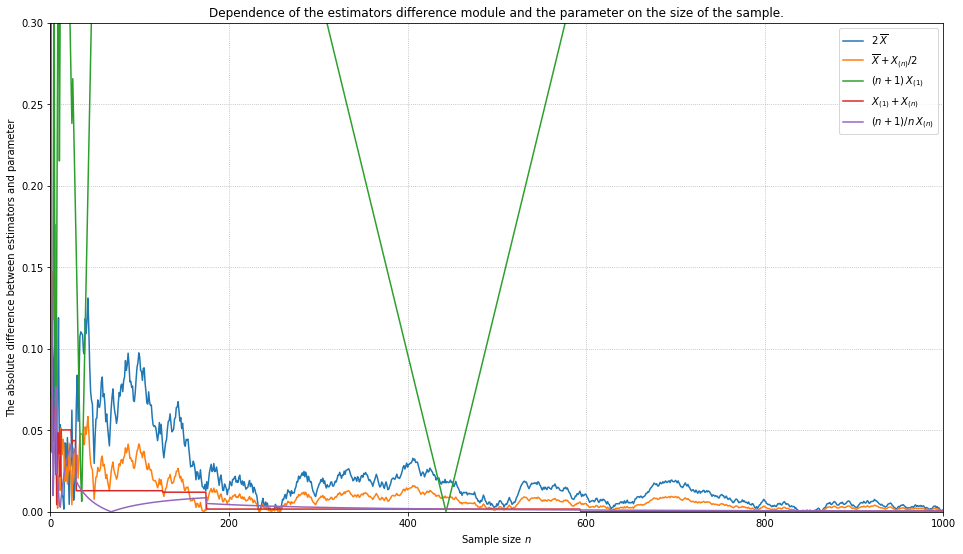

In [3]:
n = 10 ** 4
theta = 1

first, second, third,  fourth, fifth = experimental_conditions(n, theta)

plt.figure(figsize=(16, 9))

plt.plot(np.abs(first - theta), label='$2\:\overline{X}$')
plt.plot(np.abs(second - theta), label='$\overline{X} + X_{(n)}/2$')
plt.plot(np.abs(third - theta), label='$(n + 1)\:X_{(1)}$')
plt.plot(np.abs(fourth - theta), label='$X_{(1)} + X_{(n)}$')
plt.plot(np.abs(fifth - theta), label='$(n+1)/n\:X_{(n)}$')

plt.title('Dependence of the estimators difference module and the parameter on the size of the sample.')
plt.xlabel('Sample size $n$ ')
plt.ylabel('The absolute difference between estimators and parameter')
plt.ylim(0, 0.3)
plt.xlim(0, 1000)
plt.legend()
plt.grid(ls=':')
plt.show()

The graph shows that the estimator $(n+1) X_{(1)}$ is very different from the true value of the parameter, so we will exclude it from further consideration.

Now we are ready to arrange the plotting in a separate function.

In [4]:
def plotting(theta, first, second, fourth, fifth, xlim, ylim):
    plt.figure(figsize=(16, 9))

    plt.plot(np.abs(first - theta), label='$2\:\overline{X}$')
    plt.plot(np.abs(second - theta), label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.abs(fourth - theta), label='$X_{(1)} + X_{(n)}$')
    plt.plot(np.abs(fifth - theta), label='$(n+1)/n\:X_{(n)}$')

    plt.title('Dependence of the estimators difference module and the parameter on the size of the sample.')
    plt.xlabel('Sample size $n$ ')
    plt.ylabel('The absolute difference between estimators and parameter')
    plt.ylim(0, ylim)
    plt.xlim(0, xlim)
    plt.legend()
    plt.grid(ls=':')
    plt.show()

Next, let's build graphs with different parameters $\theta$.

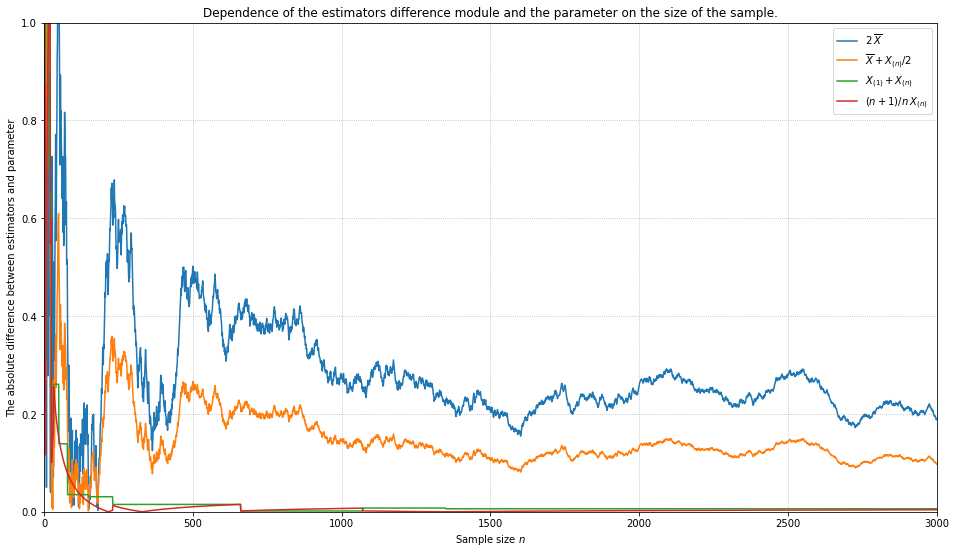

In [5]:
theta = 10

first, second, third,  fourth, fifth = experimental_conditions(n, theta)
plotting(theta, first, second, fourth, fifth, 3000, 1)

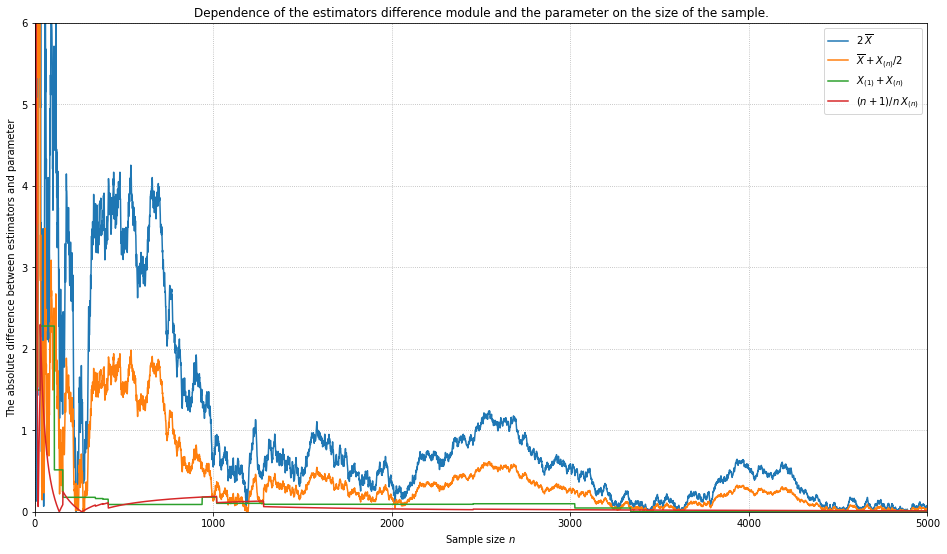

In [6]:
theta = 100

first, second, third,  fourth, fifth = experimental_conditions(n, theta)
plotting(theta, first, second, fourth, fifth, 5000, 6)

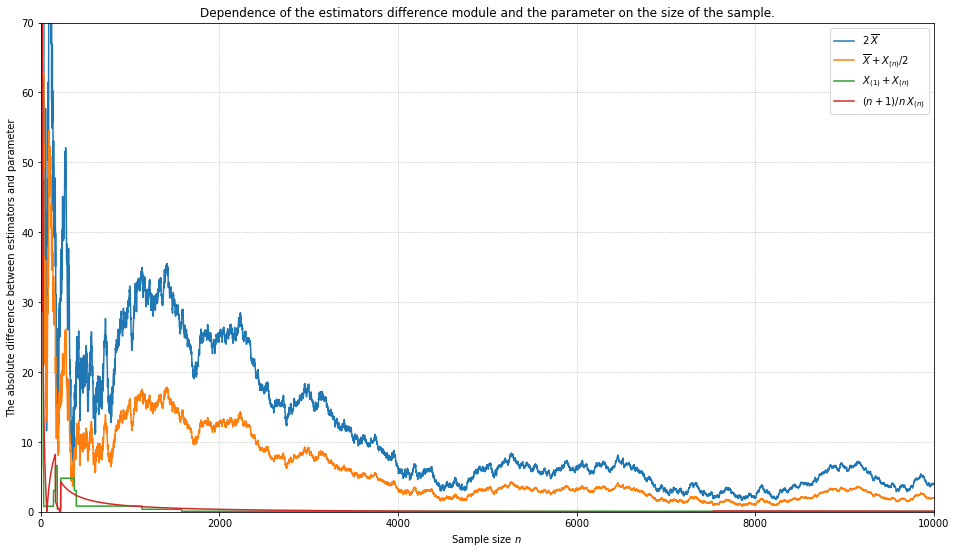

In [7]:
theta = 1000

first, second, third,  fourth, fifth = experimental_conditions(n, theta)
plotting(theta, first, second, fourth, fifth, 10000, 70)

## Conclusion

Based on the study of graphs, we can conclude that the best approximation to the estimated parameter is given by estimators that have the property of consistency. Their behavior relative to each other does not differ much depending on the cange of the parameter itself, so, for example, the best approximation (in the sense of the difference module) is given by the estimator $X_ {(1)}+X_ {(n)}$.

## Task 2

Generate a sample of $X_1, ..., X_N$ from an exponential distribution with the parameter $\theta = 1$ for $N = 10^4$. For all $b\leq N$, calculate the estimator $(k!/ \overline{X^k} )^{1/k}$ of the $\theta$parameter. Perform a study similar to the previous task and find out which$ k $score behaves better (consider at least $10$ different $k$).

## Solution

In [8]:
from scipy.special import factorial

Generate a sample from the exponential distribution.

In [9]:
n = 10 ** 4
theta = 1

samples = sps.expon.rvs(size=n, scale=1)

Let's create a function that calculates the score for the specified values of $k$.

In [10]:
def get_evaluate(k_list):
    evaluations = {
        k: (factorial(k)/(np.cumsum(samples**k)/(np.arange(n) + 1)))**(1/k) for k in k_list
    }
    return evaluations

Using the function below, we will build graphs.

In [11]:
def plotting(evaluations, ylim):
    plt.figure(figsize=(16, 9))
    for k, values in evaluations.items():
        plt.plot(np.abs(values - theta), label='$k={}$'.format(k))
    plt.title('Dependence of the estimators difference module and the parameter on the size of the sample.')
    plt.xlabel('Sample size $n$ ')
    plt.ylabel('The absolute difference between estimators and parameter')
    plt.ylim(0, ylim)
    plt.xlim(0, 10000)
    plt.legend()
    plt.grid(ls=':')
    plt.show()

We will consider several graphs at once at different values of $k$, so that it is easier to compare estimators.

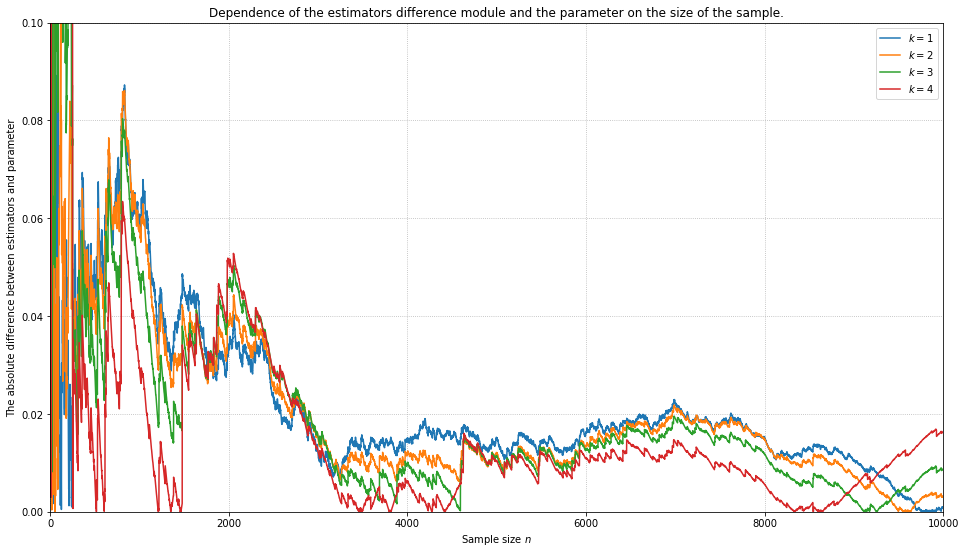

In [12]:
k_list = [1, 2, 3, 4]
plotting(get_evaluate(k_list),0.1)

Based on the graph above, it is already clear that the best set parameter is estimated at small values of $k$, and then the difference module will only increase.

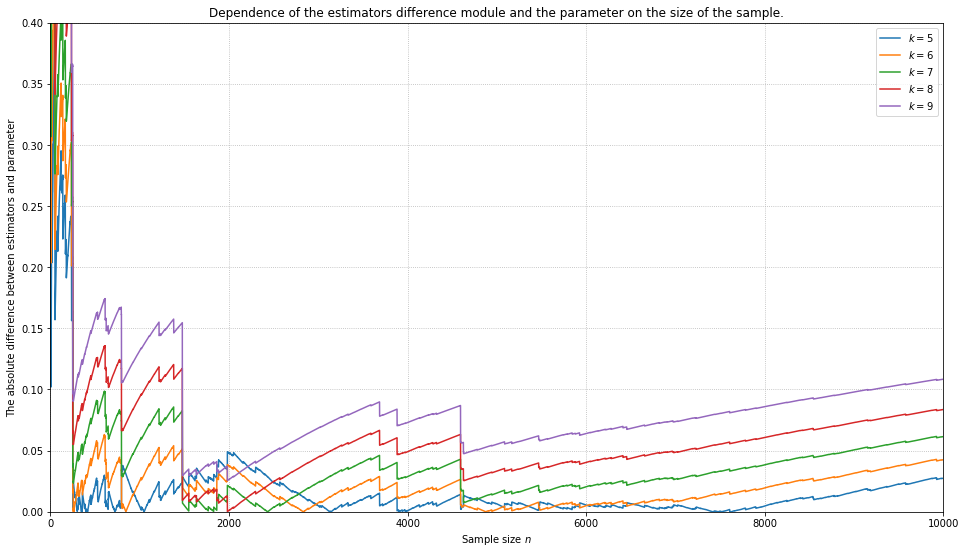

In [13]:
k_list = [5, 6, 7, 8, 9]
plotting(get_evaluate(k_list),0.4)

For theoretical interest, consider a few more extreme values of $k$. We will find that the difference modulus function shifts sharply from one plateau to another at almost the same value $n$.

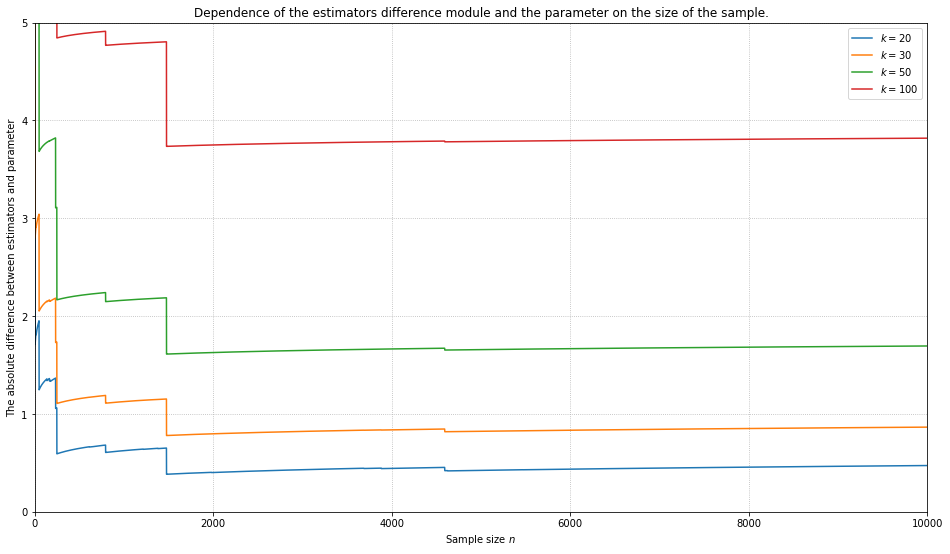

In [14]:
k_list = [20, 30, 50, 100]
plotting(get_evaluate(k_list), 5)

## Сonclusion

Based on the study of the above graphs, we can confidently say that for small values of $k$ $(1, 2)$, the estimator is $(k!/ \overline{X^k} )^{1/k}$ in the sense of the difference module evaluates the parameter $\theta$ well.

## Task 3

Come up with a distribution that has the first four moments finite and the fifth one not. Generate a sample of $X_1, ..., X_N$ from this distribution for $N = 10^4$. Plot the density graph and plot the sample points on the graph (with a zero $y$ coordinate). For all $n \leq N$, calculate the estimator $s^2 = s^2(X_1, ..., X_N)$ for the variance. Plot the dependence of the variance estimation difference module and its true value on $n$. Perform a similar study for a sample from the Cauchy distribution, where instead of plotting the difference between the variance estimator and its true value (which does not exist), plot the variance estimator.

## Solution

The relations for moments of a random variable with a Pareto distribution are $\frac{b{x^n}_m}{b-n}$, where $n$ is the number of the moment. This makes it clear that the Pareto distribution with the parameter $5$ is suitable for us.

In [15]:
n = 10**4

pareto_sample = sps.pareto.rvs(b=5, size=n)

Let's create a function for plotting the distribution density and displaying sample points.

In [16]:
def density_and_sample(sample, n, grid, pdf):
    plt.figure(figsize=(12, 8))
    plt.scatter(sample, np.zeros(n), alpha=0.2, label='sample')
    plt.plot(grid, pdf(grid), color='red', label='density')
    plt.title('Distribution density and sampling points')
    plt.xlabel('Values from the sample')
    plt.ylabel('Distribution density')
    plt.legend()
    plt.grid(ls=':')
    plt.show()

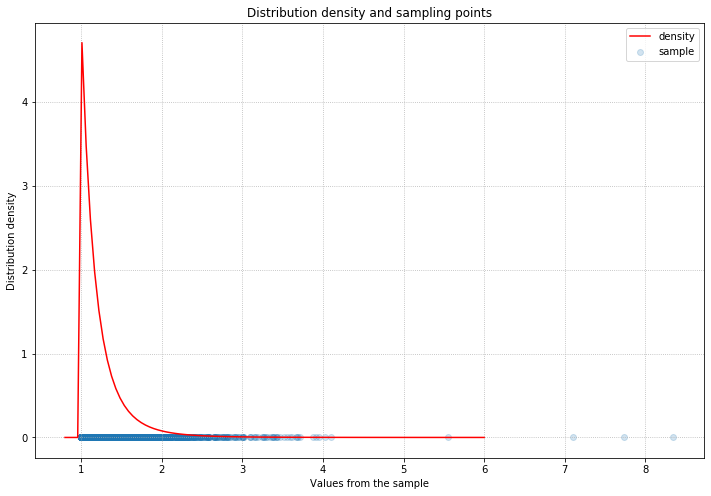

In [17]:
grid = np.linspace(0.8, 6, 100)
density_and_sample(pareto_sample, n, grid, sps.pareto(b=5).pdf)

Let's plot the dependence of the difference modulus of the sample variance and its true value on $𝑛$.

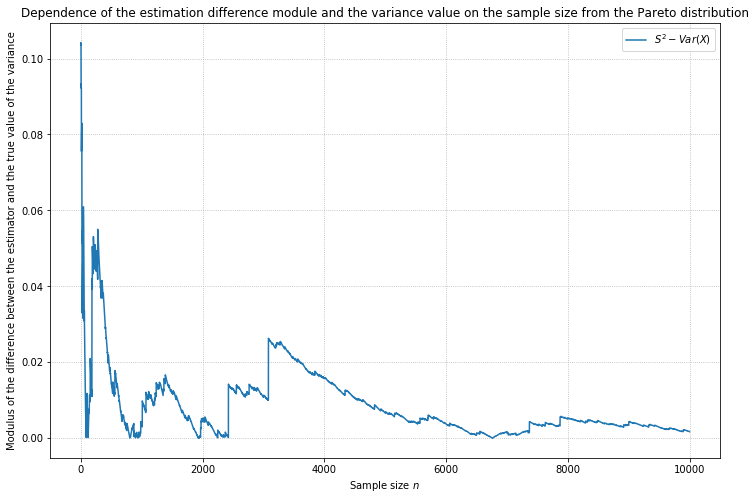

In [18]:
sample_variance = np.cumsum(pareto_sample**2)/(np.arange(n) + 1
    ) - (np.cumsum(pareto_sample)/(np.arange(n) + 1))**2

plt.figure(figsize=(12, 8))

plt.plot(np.abs(sample_variance - sps.pareto.var(b=5)), label='$S^2 - Var(X)$')

plt.title('Dependence of the estimation difference module and the variance value on the sample size from the Pareto distribution')
plt.xlabel('Sample size $n$ ')
plt.ylabel('Modulus of the difference between the estimator and the true value of the variance')
plt.legend()
plt.grid(ls=':')
plt.show()

We will conduct a similar study with a sample from the standard Cauchy distribution.

In [19]:
cauchy_sample = sps.cauchy.rvs(size=n)

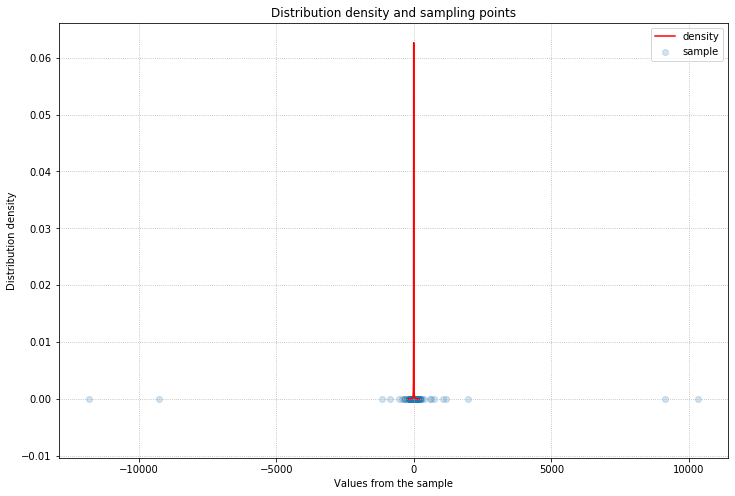

In [20]:
grid = np.linspace(-200, 200, 100)
density_and_sample(cauchy_sample, n, grid, sps.cauchy.pdf)

We see that the presence of "long tails" in the Cauchy distribution makes it difficult to visualize the density graph. In order to see the characteristic peak, a bit will limit the value of the sample.

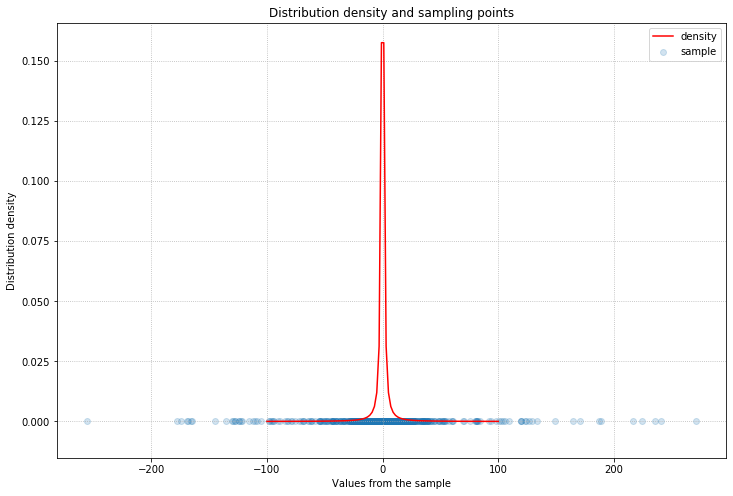

In [21]:
grid = np.linspace(-100, 100, 100)
density_and_sample(sps.trimboth(cauchy_sample, 0.001), 9980, grid, sps.cauchy.pdf)

Let's construct the dependencies of the sample variance on the size of the $n$ sample from the Cauchy distribution.

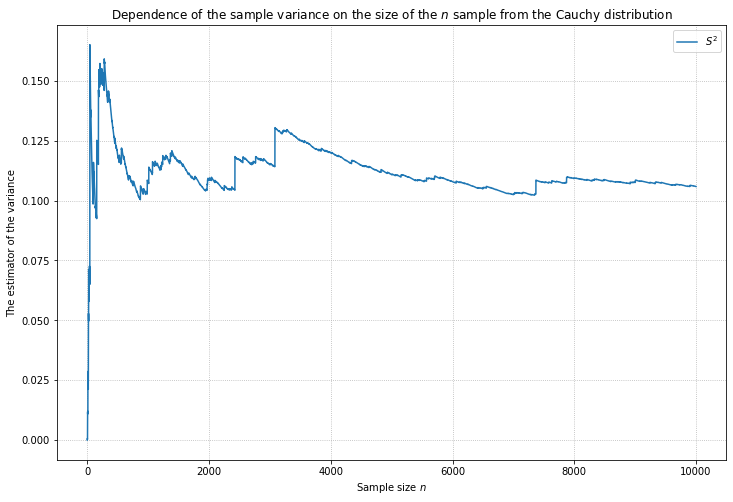

In [22]:
sample_variance = np.cumsum(pareto_sample**2)/(np.arange(n) + 1
    ) - (np.cumsum(pareto_sample)/(np.arange(n) + 1))**2

plt.figure(figsize=(12, 8))
 
plt.plot(sample_variance, label='$S^2$')

plt.title('Dependence of the sample variance on the size of the $n$ sample from the Cauchy distribution')
plt.xlabel('Sample size $n$')
plt.ylabel('The estimator of the variance')
plt.legend()
plt.grid(ls=':')
plt.show()

## Сonclusion

When performing this task, we were dealing with distributions where most of the values from the sample are concentrated in a certain neighborhood. In particular, in the case of the Cauchy distribution, it was shown that dropping a small number of extreme sample values allows better visualization of the distribution density behavior. The sample variance estimates the variance with a good degree of accuracy in the sense of the difference modulus in the case of the Pareto distribution, and in the case of the Cauchy distribution, it reaches small positive values and does not go beyond them for any sample sizes.

## Task 4

Generate a sample of $X_1, ..., X_N$ from the standard normal distribution for $N = 10^4$. For all $n \leq N$, calculate the empirical distribution function based on it. For some $n$ (e.g. $n \in {10, 25, 50, 100, 1000, N}$ ) plot the empirical distribution function (note the x-axis points of discontinuity curves, causing each of the subsamples on the x-axis in each chart, with opacity $0.2$), causing each of them the true distribution function (number of graphs is equal to the number of different values of $n$.) For all $n \leq N$, calculate the exact value of $D_n = sup_{x \in R} | \hat{F}_n(x) - F(x)|$ and plot the dependence of the statistics $D_n$ and $ \sqrt{n}D_n$ on $n$.

## Solution

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

Generate a sample from the standard normal distribution and calculate the empirical distribution function for all sample sizes. As a result, we get an array of empirical functions.

In [24]:
n = 10**4
sample = sps.norm.rvs(size=n)

empirical_functions = []
for i in range(1, n + 1):
    empirical_functions.append(ECDF(sample[:i]))

We implement a function for plotting graphs that will help us track the behavior of the empirical distribution function and compare it with the true one.

In [25]:
def CDF_and_ECDF(number):
    x = np.linspace(empirical_functions[number-1].x[1], 
        empirical_functions[number-1].x[-1], 10000)

    plt.figure(figsize=(12, 8))
    plt.scatter(sample[:number], np.zeros(number), alpha=0.2, label='sample')
    plt.plot(empirical_functions[number-1].x[1:], 
        empirical_functions[number-1].y[1:], color='red', label='ECDF')
    plt.plot(x, sps.norm.cdf(x), color='green', label='CDF')
    plt.legend()
    plt.grid(ls=':')
    plt.title('Comparison of the empirical distribution function with respect to the true one')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Let's plot the empirical distribution function for different sample values and mark the sample points.

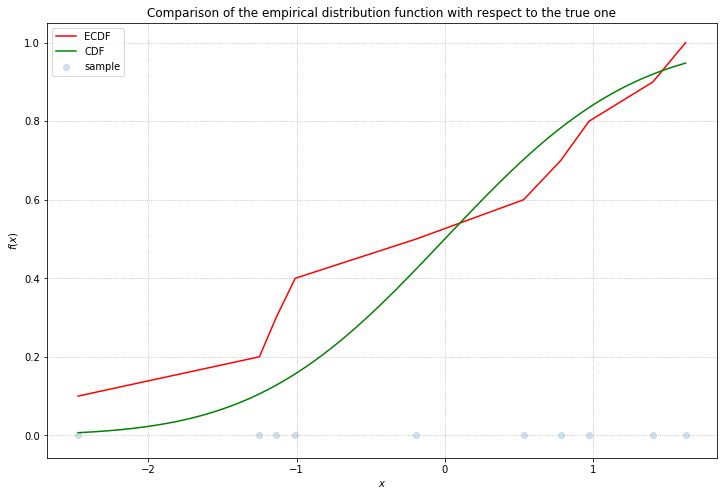

In [26]:
CDF_and_ECDF(10)

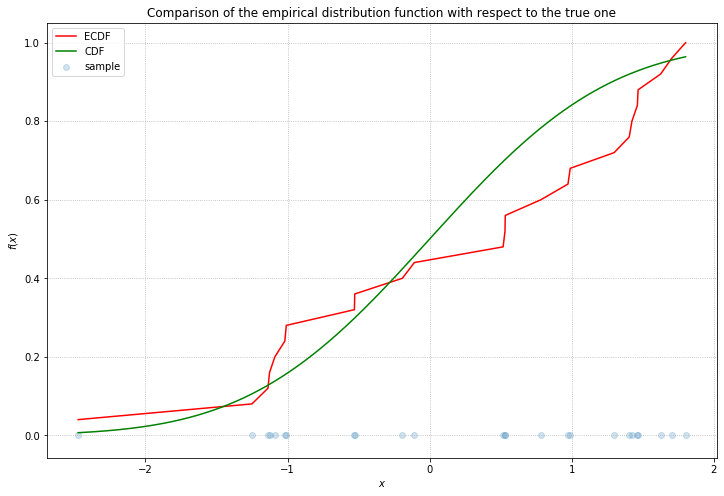

In [27]:
CDF_and_ECDF(25)

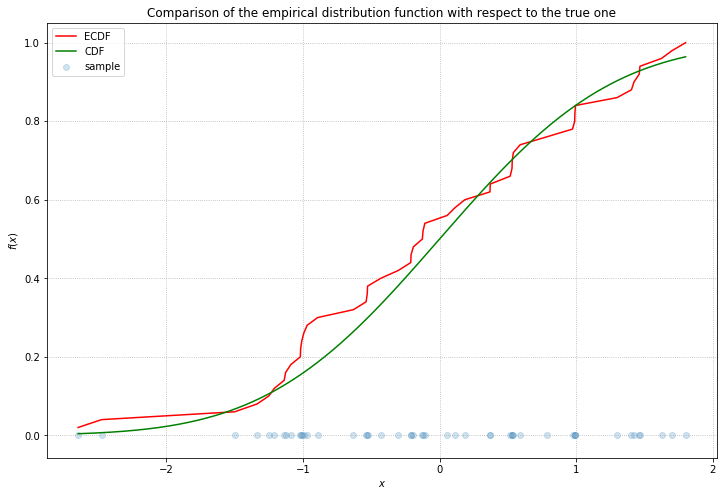

In [28]:
CDF_and_ECDF(50)

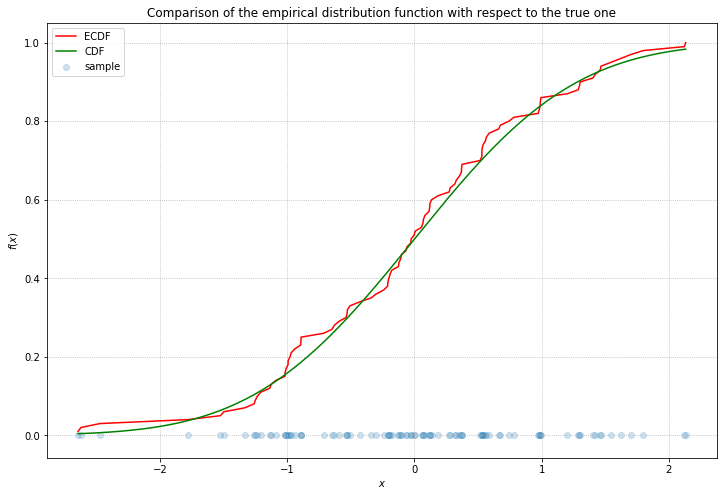

In [29]:
CDF_and_ECDF(100)

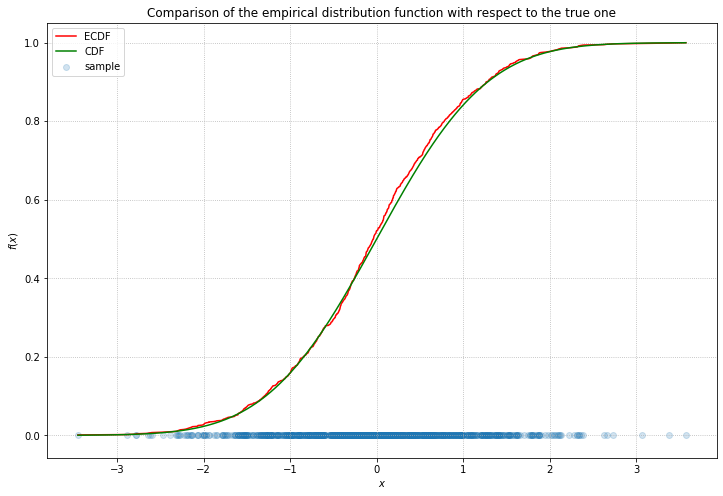

In [30]:
CDF_and_ECDF(1000)

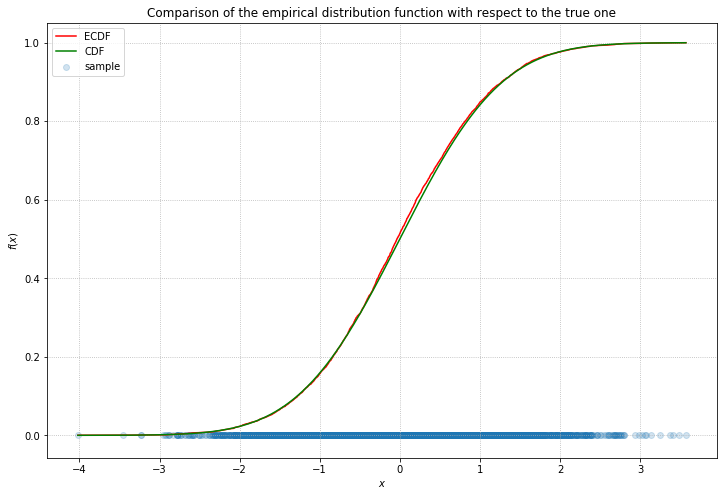

In [31]:
CDF_and_ECDF(5000)

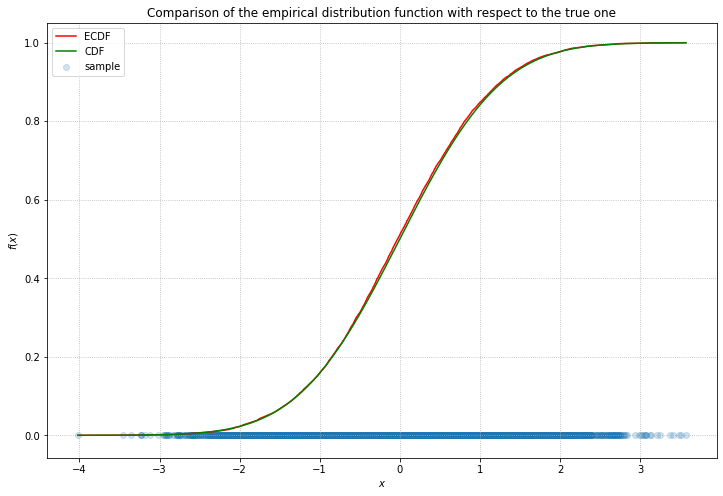

In [32]:
CDF_and_ECDF(10000)

We see that as the sample size increases, the empirical distribution function becomes more and more similar to the true one.

Next, for all values of the sample size, calculate the values $D_n = sup_{x \in R} | \hat{F}_n(x) - F(x)|$.

In [33]:
D = []
for i in range(1, n+1):
    y = empirical_functions[i-1].y
    CDF = sps.norm.cdf(empirical_functions[i - 1].x)
    D.append(max(np.max(np.abs(CDF-y)), 
            np.max(np.abs(CDF-np.concatenate(([0], y[:-1]))))))

Let's plot the dependence of the statistics $D_n$ and $\sqrt{n}D_n$ on the sample size $n$.

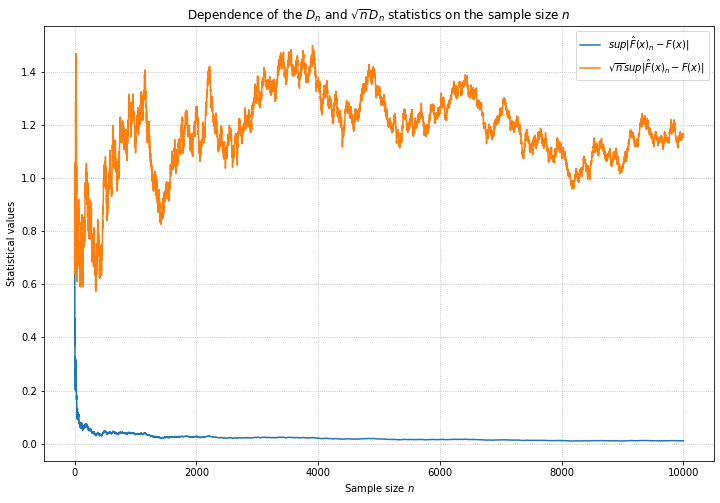

In [34]:
plt.figure(figsize=(12, 8))

plt.plot(D, label='$sup|\hat{F}(x)_n-F(x)|$')
plt.plot(np.sqrt(np.arange(n)+1)*D, label='$\sqrt{n}sup|\hat{F}(x)_n-F(x)|$')

plt.legend()
plt.grid(ls=':')
plt.title('Dependence of the $D_n$ and $\sqrt{n}D_n$ statistics on the sample size $n$')
plt.ylabel('Statistical values')
plt.xlabel('Sample size $n$')
plt.show()

## Сonclusion

The above graphs allow us to study the behavior of the empirical distribution function and its approximation to the true distribution function when increasing subsamples. The $D_n$ statistic quickly converges to zero, which is consistent with the result of the `Glivenko-Cantelli theorem`.